<a href="https://colab.research.google.com/github/nevenka-arh/python-042023/blob/main/Ukol2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Ukol 2 ***

Inflace

V souboru ukol_02_a.csv najdeš procenta lidí, kteří považují inflaci a růst životních nákladů za jeden ze svých nejzávažnějších problémů. Data jsou za dvě období - léto 2022 (sloupec 97) a zima 2022/2023 (sloupec 98). Ověř, zda se procento lidí, kteří řadí inflaci mezi 2 své nejzávažnější problémy, změnilo.

Je vhodné provést následující postup:

- Test normality obou skupin dat. Podle toho zjistíš, zda je lepší provést parametrický nebo neparametrický test.
- Formulace hypotéz testu.
- Výběr vhodného testu. Vhodný je test, který jsme na lekci nepoužívali, ale je v seznamu testů, který je součástí lekce 6. Důležité je uvědomit si, že porovnáváme tu samou skupinu států ve dvou různých časových obdobích.
- Formulace výsledek testu (na základě p-hodnoty).


In [ ]:
import pandas
from scipy import stats

data = pandas.read_csv("ukol_02_a.csv")
data.head()

,Country,98,97
0,BE,31,34
1,BG,22,31
2,CZ,34,42
3,DK,28,33
4,D-W,33,40


Test normality obou skupin dat: 


    Nulová hypotéza: Procento lidi v našem souboru mají normální rozdělení.
    Alternativní hypotéza: Procento lidi v našem souboru nemají normální rozdělení.


In [ ]:
normality1 = stats.shapiro(data["97"])
print(normality1)

normality2 = stats.shapiro(data["98"])
print(normality2)

ShapiroResult(statistic=0.9694532752037048, pvalue=0.33090925216674805)
ShapiroResult(statistic=0.9803104996681213, pvalue=0.687289297580719)


V obou případech máme p-hodnotu větší než 0,05, takže nulovou hypotézu nemůžeme zamítnout, což znamená, že obě skupiny mají normální rozdělení a můžeme použít parametrické testy. 

Formulace hypotéz testu: 

    H0 = Procento lidí v obou sledovaných časových obdobích je stejná
    H1 = Procento lidí v obou sledovaných časových obdobích je různá

Výběr vhodného testu. Vhodný je test, který jsme na lekci nepoužívali, ale je v seznamu testů, který je součástí lekce 6. Důležité je uvědomit si, že porovnáváme tu samou skupinu států ve dvou různých časových obdobích.

      zde si myslím, že bychom si měli vybrat z Testy porovnávající dvě různé statistické skupiny - nepárový t-test, který předpokládá normální rozdělení dat. 

In [ ]:
res = stats.ttest_ind(data["97"], data["98"])
res

Ttest_indResult(statistic=2.7553366726094906, pvalue=0.007257579008109787)

    P-value = 0,007. Nulové hypoteza můžeme zamítnout. Procento lidi kteří řadí inflaci mezi 2 své nejzávažnější problémy se změnilo. 

# Důvěra ve stát a v EU

Ve výzkumu je dále zkoumáno, jak moc lidé věří své národní vládě a jak moc věří EU. Data jsou v souboru ukol_02_b.csv. Číslo udává procento lidí, kteří dané instituci věří. Ověř, zda existuje korelace mezi procentem lidí, které věří EU a procentem lidí, kteří věří své národní vládě.

Je vhodné provést následující postup:

- Test normality obou skupin dat.
- Formulace hypotéz testu.
- Volba vhodného testu. Pokud data nemají normální rozdělení, můžeš využít test korelace, který jsme prováděli na lekci. Pokud data normální rozdělení mají, můžeš použít test zmíněný v přehledu testů v dané lekci.


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats

data = pandas.read_csv("ukol_02_b.csv")
data.head()

,Country,National Government Trust,EU Trust
0,BE,40,55
1,BG,19,49
2,CZ,30,43
3,DK,52,65
4,D-W,54,53


In [ ]:
split_point = 29
data_EU = data.iloc[:split_point]  
data_EU 


,Country,National Government Trust,EU Trust
0,BE,40,55
1,BG,19,49
2,CZ,30,43
3,DK,52,65
4,D-W,54,53
5,DE,49,49
6,D-E,30,32
7,EE,39,48
8,IE,46,58
9,EL,22,37


Test normality obou skupin dat:


    H0: Data mají normální rozdělení
    H1: Data nemají normální rozdělení


In [ ]:
norm1 = stats.normaltest(data["National Government Trust"])
norm1

NormaltestResult(statistic=2.540452652977692, pvalue=0.2807680693355376)

In [ ]:
norm2 = stats.normaltest(data["EU Trust"])
norm2

NormaltestResult(statistic=1.7215981412912211, pvalue=0.42282408098089164)

    P-hodnota je vyšší než 0,05 v obou skupinách dat. Existuje normální rozdělení a nulovou hypotézu nemůžeme zamítnout, takže později potřebujeme parametrický test. 

Formulace hypoteze: 

    H0: procento lidí, které věří EU a procento lidí, kteří věří své národní vládě nejsou statisticky závislé 
    H1: procento lidí, které věří EU a procento lidí, kteří věří své národní vládě jsou statisticky závislé

In [ ]:
result = stats.pearsonr(data["National Government Trust"], data["EU Trust"])
result

PearsonRResult(statistic=0.46201070020654905, pvalue=0.00235858371287143)

    P-value = 0.002, nulova hypotza muzeme zamitnout. Procento lidi ktere veri EU a procento lidi ktere veri sve narodni vlade jsou statisticky zavisle.

,National Government Trust,EU Trust
National Government Trust,1.000000,0.593122
EU Trust,0.593122,1.000000


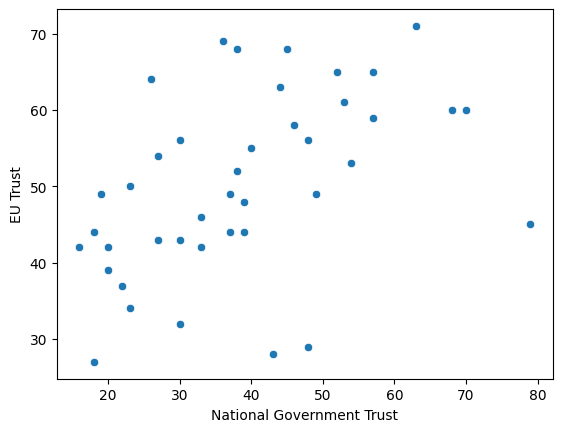

In [28]:
import pandas
import seaborn
import matplotlib.pyplot as plt
seaborn.scatterplot(data=data, x="National Government Trust", y="EU Trust")

data_vybrane_sloupce = data_EU[["National Government Trust", "EU Trust"]]
data_vybrane_sloupce.corr()

    Z grafu a korelační matice je patrné, že korelace mezi hodnotami není příliš silná, a také máme malý počet pozorování.

# Důvěra v EU a euro

Nakonec si rozdělíme státy EU na dvě skupiny - státy v eurozóně a státy mimo ni. Jak je to s důvěrou v EU? Důvěřují EU více lidé, kteří žijí ve státech platící eurem? Využij znovu data o důvěře v EU ze souboru ukol_02_b.csv a rozděl státy na ty, které jsou v eurozóně, a ty, které jsou mimo ni. Porovnej, jak se liší důvěra v EU v těchto dvou skupinách zemí. Státy můžeš rozdělit s využitím tabulky v souboru countries.csv.

- Test normality můžeš vynechat, řiď se výsledkem z předchozí části.
- Formulace hypotéz testu.
- Volba vhodného testu. Pokud data nemají normální rozdělení, můžeš využít test z bonusového úkolu ze 7 lekce. Pokud data normální rozdělení mají, můžeš použít test zmíněný v přehledu testů v dané lekci.


In [41]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
contries = pandas.read_csv("countries.csv")
contries
merge= pd.merge(data,contries, on='Country')
merge




,Country,National Government Trust,EU Trust,Country Name,Euro
0,BE,40,55,Belgium,1
1,BG,19,49,Bulgaria,0
2,CZ,30,43,Czechia,0
3,DK,52,65,Denmark,0
4,DE,49,49,Germany,1
5,EE,39,48,Estonia,0
6,IE,46,58,Ireland,1
7,EL,22,37,Greece,1
8,ES,23,50,Spain,1
9,FR,23,34,France,1


In [53]:
merged_full = merge.sort_values(by='Euro', ascending=True)

merged_full = merged_full.reset_index()
merged_full


,index,Country,National Government Trust,EU Trust,Country Name,Euro
0,26,SE,53,61,Sweden,0
1,1,BG,19,49,Bulgaria,0
2,2,CZ,30,43,Czechia,0
3,3,DK,52,65,Denmark,0
4,5,EE,39,48,Estonia,0
5,22,RO,27,54,Romania,0
6,20,PL,26,64,Poland,0
7,10,HR,20,42,Croatia,0
8,16,HU,48,56,Hungary,0
9,24,SK,18,44,Slovakia,1


In [55]:
split_point1 = 9
noEuro = merged_full.iloc[:split_point1]  
noEuro

,index,Country,National Government Trust,EU Trust,Country Name,Euro
0,26,SE,53,61,Sweden,0
1,1,BG,19,49,Bulgaria,0
2,2,CZ,30,43,Czechia,0
3,3,DK,52,65,Denmark,0
4,5,EE,39,48,Estonia,0
5,22,RO,27,54,Romania,0
6,20,PL,26,64,Poland,0
7,10,HR,20,42,Croatia,0
8,16,HU,48,56,Hungary,0


In [58]:
split_point2 = 9
Euro = merged_full.iloc [split_point2:]
Euro

,index,Country,National Government Trust,EU Trust,Country Name,Euro
9,24,SK,18,44,Slovakia,1
10,23,SI,37,44,Slovenia,1
11,21,PT,45,68,Portugal,1
12,19,AT,39,44,Austria,1
13,18,NL,38,52,Netherlands,1
14,17,MT,63,71,Malta,1
15,0,BE,40,55,Belgium,1
16,14,LT,36,69,Lithuania,1
17,25,FI,68,60,Finland,1
18,12,CY,33,42,Cyprus,1


In [59]:
noEuro.rename(columns={"EU Trust": "EUtrust1"})

,index,Country,National Government Trust,EUtrust1,Country Name,Euro
0,26,SE,53,61,Sweden,0
1,1,BG,19,49,Bulgaria,0
2,2,CZ,30,43,Czechia,0
3,3,DK,52,65,Denmark,0
4,5,EE,39,48,Estonia,0
5,22,RO,27,54,Romania,0
6,20,PL,26,64,Poland,0
7,10,HR,20,42,Croatia,0
8,16,HU,48,56,Hungary,0


In [64]:
Euro.rename(columns= {"EU Trust" : "EUtrust2"})


,index,Country,National Government Trust,EUtrust2,Country Name,Euro
9,24,SK,18,44,Slovakia,1
10,23,SI,37,44,Slovenia,1
11,21,PT,45,68,Portugal,1
12,19,AT,39,44,Austria,1
13,18,NL,38,52,Netherlands,1
14,17,MT,63,71,Malta,1
15,0,BE,40,55,Belgium,1
16,14,LT,36,69,Lithuania,1
17,25,FI,68,60,Finland,1
18,12,CY,33,42,Cyprus,1


 Formulace hypotéz testu. 

    H0 =  důvěra v EU  se ne liší v těchto dvou skupinách zemí
    H1 =  důvěra v EU  se  liší v těchto dvou skupinách zemí




In [73]:
x = [61, 49, 43, 65, 48, 54, 64, 42, 56]
y = [ 44, 44, 68, 44, 52, 71, 55, 69, 60, 42, 46, 34, 50, 37, 58, 49, 60, 56]

stats.kruskal(x, y)

KruskalResult(statistic=0.08022235822113498, pvalue=0.7769963037674541)

    P-value = 0.776. Nulovou hypotézu nelze zamítnout, což znamená, že důvěra v EU se v zemích eurozóny a mimo ni neliší.